# Overview

This project consist of a simple Timeseries Prediction and Forcast of S&P500. The techeniques I learned from different sources and implemented here are:
- Basic Data Manipulation and Prediction [Dataquest](https://www.youtube.com/watch?v=1O_BenficgE)
- Functional techeniques for LTSM [Computer Science](https://www.youtube.com/watch?v=QIUxPv5PJOY) 
- Forcasting Stock Price using long short-term memory (LSTM), Gated Recurrent Unit (GRU) and Convolution Neural Network (CNN) [Greg Hogg](https://www.youtube.com/watch?v=kGdbPnMCdOg)

Furthermore, I gained understanding about Time Series knowledge from [Aileen Nielsen 2016 Scipy lecture](https://www.youtube.com/watch?v=JNfxr4BQrLk&t=9111s) & [Aileen Nielsen 2019 Scipy lecture](https://www.youtube.com/watch?v=v5ijNXvlC5A). Those lectures gives me a good understanding of the basic of Time Series Analysis and Forcasting.

The goal of this project is to understand Time Series Analysis and Forcasting, and put my skills to practice.



# Data
We use yfinance package, which uses Yahoo Finance API to get the index prices. We use the `GSPC` ticker class to enable us to download the S&P500 data. Furthermore, we quarry the historical prices from the very begning, since the index has been created.

The objective is to build a model which can predict the tomorrows price of S&P500, by using historical data.

## Reading Data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 4370.36,
 'open': 4344.88,
 'dayLow': 4335.31,
 'dayHigh': 4381.82,
 'regularMarketPreviousClose': 4370.36,
 'regularMarketOpen': 4344.88,
 'regularMarketDayLow': 4335.31,
 'regularMarketDayHigh': 4381.82,
 'volume': 2157858000,
 'regularMarketVolume': 2157858000,
 'averageVolume': 4002475967,
 'averageVolume10days': 3880626000,
 'averageDailyVolume10Day': 3880626000,
 'bid': 4355.92,
 'ask': 4387.0,
 'bidSize': 0,
 'askSize': 0,
 'fiftyTwoWeekLow': 3491.58,
 'fiftyTwoWeekHigh': 4607.07,
 'fiftyDayAverage': 4452.9243,
 'twoHundredDayAverage': 4129.6484,
 'currency': 'USD',
 'exchange': 'SNP',
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6',
 'messageBoardId': 'finmb_INDEXGSPC',
 'gmtOffSetMilliseconds': -1

In [3]:
# get the historic data from the API
sp500 = sp500.history(period="max")        # pandas dataframe
sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,0.0,0.0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0


The data consist of the price on a single trading day. Non-trading days are not included in the data. Except dividents and stock splits, we use each column and build a more accurate model which can predict the price of the next day. 


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-08-07 00:00:00-04:00', '2023-08-08 00:00:00-04:00',
               '2023-08-09 00:00:00-04:00', '2023-08-10 00:00:00-04:00',
               '2023-08-11 00:00:00-04:00', '2023-08-14 00:00:00-04:00',
               '2023-08-15 00:00:00-04:00', '2023-08-16 00:00:00-04:00',
               '2023-08-17 00:00:00-04:00', '2023-08-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24023, freq=None)

## Data processing

<Axes: title={'center': 'S&P 500 Close Price'}, xlabel='Date'>

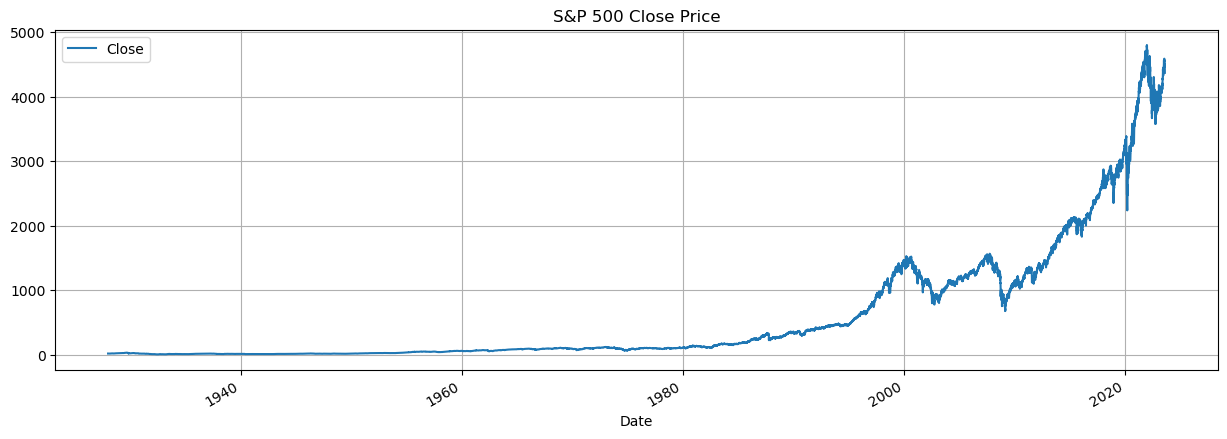

In [5]:
# Visualize the closing price
sp500.plot.line(y = 'Close', figsize = (15, 5), title = 'S&P 500 Close Price', grid = True, legend = True)

It appeared that the price of the fund actually seen an upward growth post 1980.

In [6]:
# Drop the columns Dividends and Stock Splits from sp500. Save the result as sp500.
sp500 = sp500.drop(["Dividends", "Stock Splits"], axis=1)
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


## Setting up the "Target" variable
This is what we want to predict using ML. This makes it more of a classification challange, which tackles `whether the price will go up or down tomorrow?` Besides predicting actual price, predicting the direction of the price is a more practical approach and it further helps to generate trading signals and make trading decisions.

In [7]:
# creating a new column for tomorrow's closing price
sp500["tomorrow"] = sp500["Close"].shift(-1)       # shift index by -1
sp500

,Open,High,Low,Close,Volume,tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863


In [8]:
# Target: weather tomorrow > Close (today) or < close (today).
sp500["target"] = np.where(sp500["tomorrow"] > sp500["Close"], 1,0)
sp500

,Open,High,Low,Close,Volume,tomorrow,target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863,0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0


# Model Building
Initially we will be using Random Forest Classifier to predict the movement of the stock price. The reason for choosing Random Forest is that it is a very robust model and it can handle non-linear relationships very well. Besides, it is also very easy to tune the model and it is not prone to overfitting.

## Data Modelling
Our main focused variable is a `Close` price. Our goal is to build a more robust ways to predict the target variable. We will use the following ways to ensure the robustness of our model:
- Create a lag variable of the Close price
- Create a rolling avg of the Close Price [2 days, 5 days, 60 days, 250 days (1 year), 1000 days (4 years)]
- Create a ratio of current closing price to the rolling avgs




In [9]:
# horizon lengths: 2 days, 5 days, 60 days, 250 days (1 year), 1000 days (4 years)
horizons = [2,5,60,250,1000]               

predictors = []

for horizon in horizons:
    rolling_avg = sp500.rolling(window=horizon).mean() # rolling average

    # name of Ratio column
    ratio_column = f"close_ratio_{horizon}d" 
    sp500[ratio_column] = sp500['Close']/rolling_avg["Close"]      # compute ratio

    # name of Trend (no of days in a horizen when Target is 1 or stk price actually went up) column
    trend_column = f"trend_{horizon}d"
    sp500[trend_column] = sp500.shift(1).rolling(window=horizon).sum()["target"] # Rolling sum of Target

    predictors+= [ratio_column, trend_column]


In [10]:
# drop unnecessary columns
sp500.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

# remove the previous data
sp500 = sp500.loc['1980-01-01':].copy()
sp500

,Close,Volume,tomorrow,target,close_ratio_2d,trend_2d,close_ratio_5d,trend_5d,close_ratio_60d,trend_60d,close_ratio_250d,trend_250d,close_ratio_1000d,trend_1000d
Date,,,,,,,,,,,,,,
1980-01-02 00:00:00-05:00,105.760002,40610000,105.220001,0,0.989799,1.0,0.984217,3.0,1.008532,31.0,1.025908,136.0,1.058671,514.0
1980-01-03 00:00:00-05:00,105.220001,50480000,106.519997,1,0.997441,0.0,0.983879,2.0,1.004126,31.0,1.020416,136.0,1.053192,513.0
1980-01-04 00:00:00-05:00,106.519997,39130000,106.809998,1,1.006140,1.0,0.998725,2.0,1.016550,32.0,1.032735,136.0,1.066123,513.0
1980-01-07 00:00:00-05:00,106.809998,44500000,108.949997,1,1.001359,2.0,1.003382,3.0,1.019072,33.0,1.035224,137.0,1.068934,514.0
1980-01-08 00:00:00-05:00,108.949997,53390000,109.050003,1,1.009918,2.0,1.021547,3.0,1.038846,34.0,1.055562,137.0,1.090231,515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4489.720215,3896410000,4437.859863,0,1.002867,1.0,1.002631,2.0,1.020476,34.0,1.103469,120.0,1.169828,534.0
2023-08-15 00:00:00-04:00,4437.859863,3832250000,4404.330078,0,0.994191,1.0,0.993780,2.0,1.007773,33.0,1.090581,119.0,1.155837,534.0
2023-08-16 00:00:00-04:00,4404.330078,3753910000,4370.359863,0,0.996208,0.0,0.989080,2.0,0.999356,33.0,1.082203,119.0,1.146648,533.0


## ML Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=42) 


## Predictions from ML model

In [12]:
# Predict Function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    predictions = model.predict_proba(test[predictors])[:,1]    # Predict probabilities for the test set (2nd column only as 1st column is 0s)
    predictions[predictions >= 0.6] = 1                # Set threshold to 0.6
    predictions[predictions < 0.6] = 0
    
    # make predictions a series object and set the index to the test set index
    predictions = pd.Series(predictions, index=test.index, name='predictions_prob')
    combined = pd.concat([test['target'], predictions], axis=1)
    return combined

    

In [13]:
# using dynamic train and test data to achieve a better result

def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, len(data), step):
        train = data.iloc[0:i].copy()        # copy b/c we don't want to change the original data
        test = data.iloc[i:i+step].copy()
        predictionss = predict(train, test, predictors, model)
        all_predictions.append(predictionss)
    
    return pd.concat(all_predictions)

In [14]:
pred = backtest(sp500, model, predictors)
pred['predictions_prob'].value_counts()

0.0    7369
1.0    1132
Name: predictions_prob, dtype: int64

Our model predicted only 1132 days for prices to go up.

In [15]:
from sklearn.metrics import precision_score

precision_score(pred["target"], pred['predictions_prob'])

0.5697879858657244

This means, our model is 56.9% accurate in predicting the direction of the stock price movement. This is not bad, but not good either. We can improve this by using more data, or by using more features. But, for now, let's see how our model is doing in predicting the actual price of the stock.

In [16]:
pred

,target,predictions_prob
Date,,
1989-11-20 00:00:00-05:00,1,0.0
1989-11-21 00:00:00-05:00,1,0.0
1989-11-22 00:00:00-05:00,1,0.0
1989-11-24 00:00:00-05:00,1,0.0
1989-11-27 00:00:00-05:00,1,0.0
...,...,...
2023-08-14 00:00:00-04:00,0,0.0
2023-08-15 00:00:00-04:00,0,1.0
2023-08-16 00:00:00-04:00,0,1.0


# Forcasting
Using past 60 days closing price to predict the next day closing price.



In [17]:
# Data - A numpy array of the closing prices of the S&P 500 from 1980 to 2015
df = sp500[['Close']]
df 
print(df.shape)

(11001, 1)


In [18]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))   # Scale the data between 0 and 1 (inclusive)
scaled_data = scaler.fit_transform(df)

# Create the training data set
train_data_len = int(np.ceil(len(df) * .8))   # 80% of the data
train_data_len




8801

In [19]:
scaled_data


array([[0.00160482],
       [0.00148989],
       [0.00176658],
       ...,
       [0.91651733],
       [0.90928707],
       [0.90914874]])

In [20]:
# Training data

train = scaled_data[0:train_data_len, :]

# Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train)):

    # Append the past 60 values to X_train
    X_train.append(train[i-60:i, 0])

    # Append the corrosponding value to y_train
    y_train.append(train[i, 0])


# Convert the x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))     # (num of samples, num of time steps, num of features)
X_train.shape, y_train.shape
     


((8741, 60, 1), (8741,))

In [21]:
# Build a LSTM Model

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers

model = Sequential()                   # Build a LSTM model
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)) # Add LSTM layer 
model.add(LSTM(50, return_sequences=True))                                             # Add LSTM layer
model.add(Dense(25))                                                                 # Add Dense layer
model.add(Dense(1))                                                                 # Add Dense layer



In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=1)

8741/8741 [==============================] - 121s 14ms/step - loss: 2.6223e-04


In [24]:
# create test data
test_data = scaled_data[train_data_len - 60: , :]
# create x_test and y_test
x_test = []
y_test = df[train_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# convert data to numpy array
x_test = np.array(x_test)
# reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
# Get the prediction of the model
prediction = model.predict(x_test)

# Inverse the scaling of the data
predictions = scaler.inverse_transform(prediction.reshape(-1, 1))

69/69 [==============================] - 1s 9ms/step


In [36]:
print(predictions.shape)
print(predictions.flatten().shape)
print(y_test.shape)

(132000, 1)
(132000,)
(2200, 1)


In [37]:
y_test = y_test.values.reshape(-1, 1)
y_test.shape

(2200, 1)

In [38]:
# Get the RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("RMSE: %f" % (rmse))


ValueError: operands could not be broadcast together with shapes (132000,1) (2200,1) 